In [63]:
# Initial imports
import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
mana_path = Path("../Resources/index_reference/mana-usd-max.csv")
mana_df = pd.read_csv(mana_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
mana_df.index = mana_df.index.date
mana_df

,price,market_cap,total_volume
2017-10-28,0.010094,2.295129e+07,2.421181e+05
2017-10-29,0.010124,2.301864e+07,2.958165e+05
2017-10-30,0.009775,2.222603e+07,2.659636e+05
2017-10-31,0.009237,2.100224e+07,2.751197e+05
2017-11-01,0.010004,2.274761e+07,4.555642e+05
...,...,...,...
2021-04-02,1.012906,1.346325e+09,3.801542e+08
2021-04-03,1.035631,1.375571e+09,3.392498e+08
2021-04-04,0.942694,1.259852e+09,3.686334e+08
2021-04-05,1.002164,1.329384e+09,2.885374e+08


____________________________________________________________
** PLot Daily Prices **
____________________________________________________________

In [65]:
mana_prices = mana_df[['price']]
mana_prices

,price
2017-10-28,0.010094
2017-10-29,0.010124
2017-10-30,0.009775
2017-10-31,0.009237
2017-11-01,0.010004
...,...
2021-04-02,1.012906
2021-04-03,1.035631
2021-04-04,0.942694
2021-04-05,1.002164


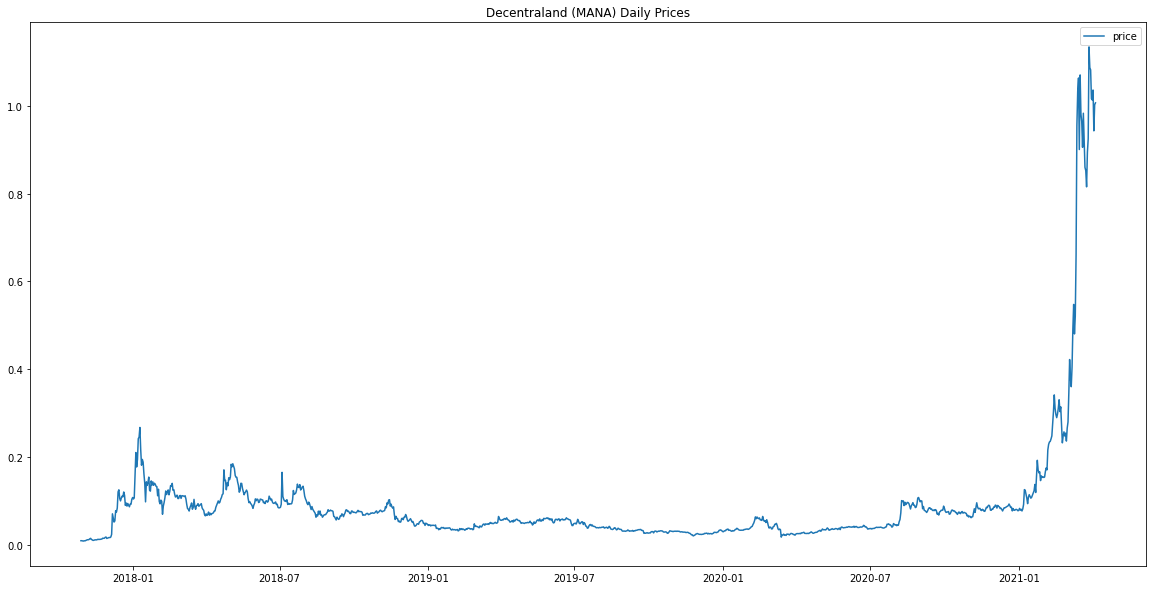

In [66]:
mana_prices.plot(figsize=[20,10], title="Decentraland (MANA) Daily Prices");

____________________________________________________________
** Calculate Daily Returns **
____________________________________________________________

In [67]:
mana_daily_returns = mana_prices.pct_change().dropna()
mana_daily_returns = mana_daily_returns.rename(columns={'price': 'returns'})
mana_daily_returns

,returns
2017-10-29,0.002935
2017-10-30,-0.034433
2017-10-31,-0.055061
2017-11-01,0.083104
2017-11-02,-0.027987
...,...
2021-04-02,-0.002880
2021-04-03,0.022435
2021-04-04,-0.089739
2021-04-05,0.063084


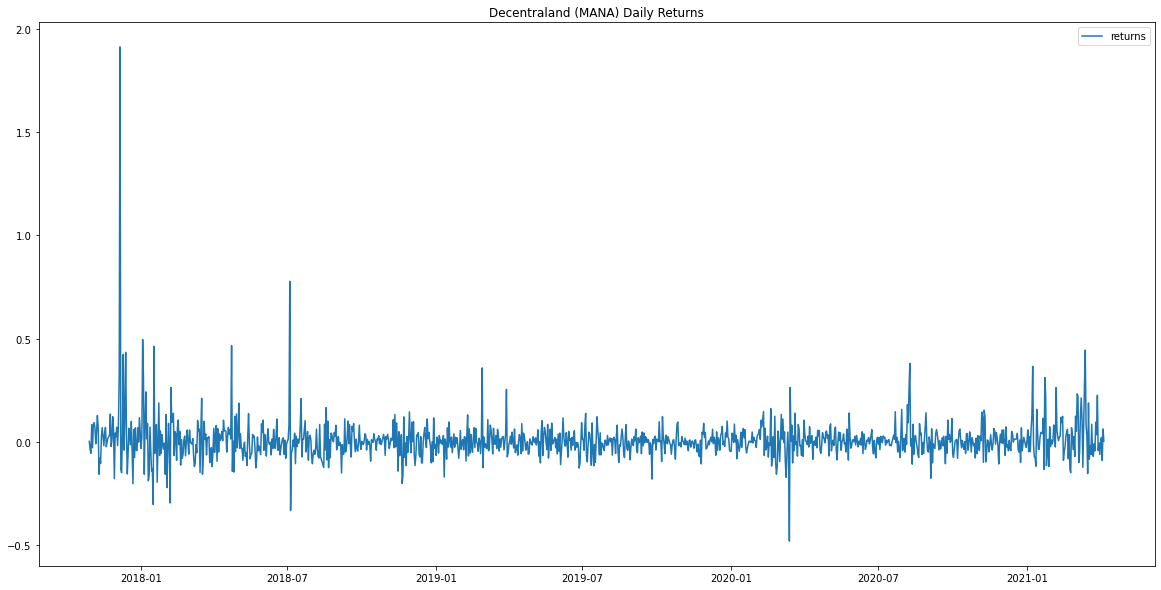

In [68]:
mana_daily_returns.plot(figsize=[20,10], title="Decentraland (MANA) Daily Returns");

____________________________________________________________
** Calculate Cumulative Returns **
____________________________________________________________

In [69]:
mana_cumulative_returns = (1 + mana_daily_returns).cumprod()
mana_daily_returns = mana_daily_returns.rename(columns={'returns': 'cumulative returns'})
mana_cumulative_returns

,returns
2017-10-29,1.002935
2017-10-30,0.968400
2017-10-31,0.915079
2017-11-01,0.991126
2017-11-02,0.963388
...,...
2021-04-02,100.347351
2021-04-03,102.598663
2021-04-04,93.391576
2021-04-05,99.283116


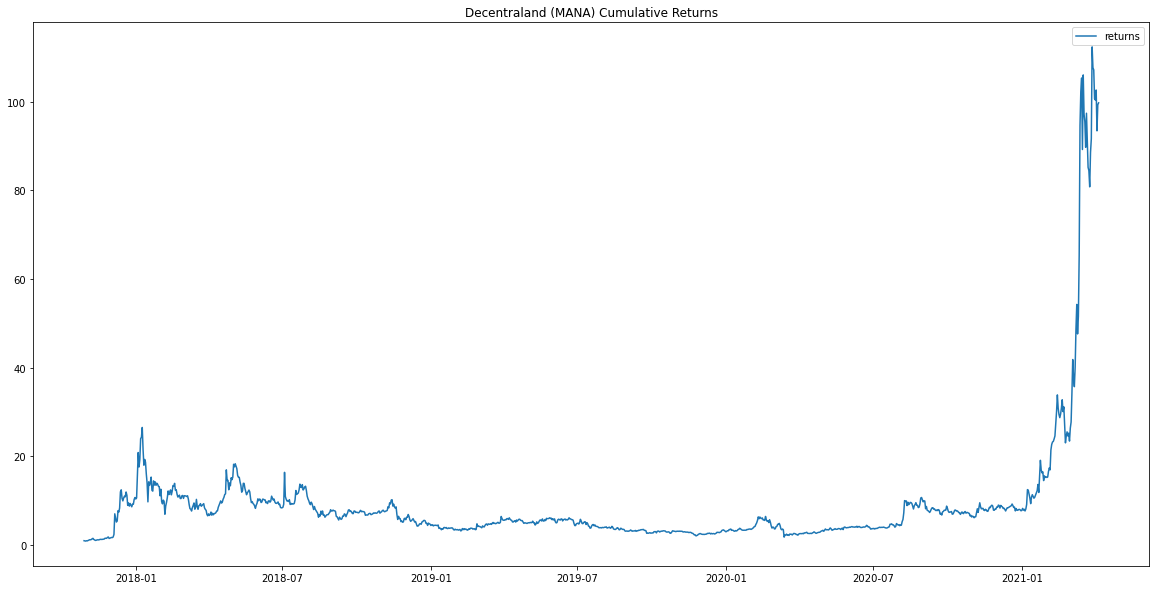

In [70]:
mana_cumulative_returns.plot(figsize=[20,10], title="Decentraland (MANA) Cumulative Returns");

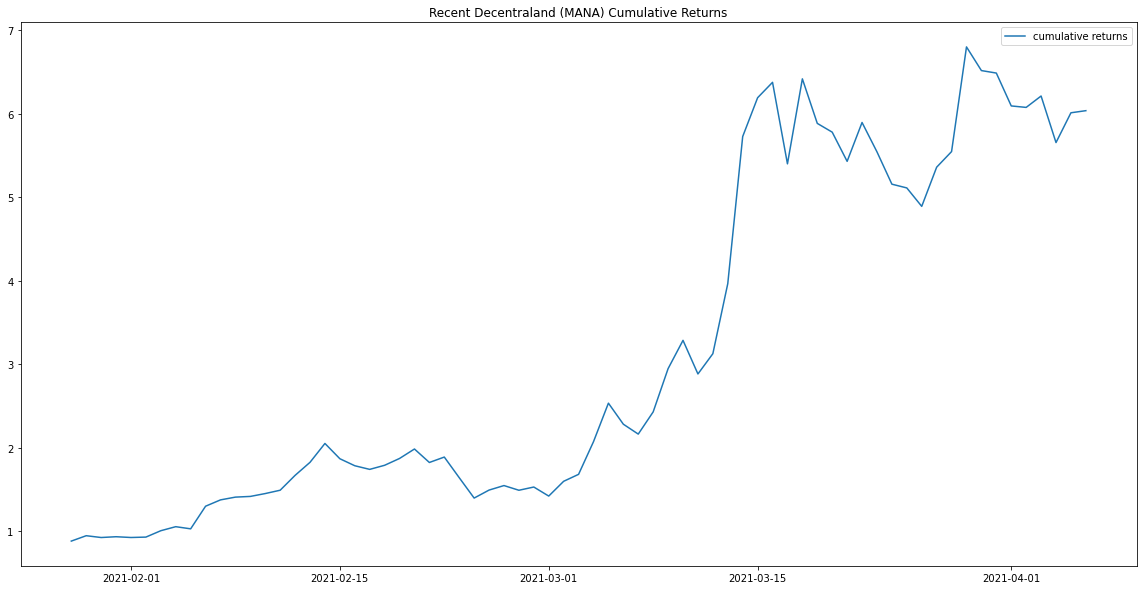

In [71]:
recent_mana_prices = mana_prices.iloc[1185:]
recent_mana_returns = recent_mana_prices.pct_change().dropna()
recent_mana_cumulative_returns = (1 + recent_mana_returns).cumprod()
recent_mana_cumulative_returns = recent_mana_cumulative_returns.rename(columns={'price': 'cumulative returns'})
recent_mana_cumulative_returns.plot(figsize=[20,10], title="Recent Decentraland (MANA) Cumulative Returns");

____________________________________________________________
** Rolling Statistics **
____________________________________________________________

** >>>>>>>>> Rolling Means **

In [72]:
# Rolling 7 Day Mean

mana_7d_rolling_mean_price = mana_prices.rolling(window=7).mean().round(2).dropna()
mana_7d_rolling_mean_price = mana_7d_rolling_mean_price.rename(columns={'price': '7-day rolling price average'})

mana_30d_rolling_mean_price = mana_prices.rolling(window=30).mean().round(2).dropna()
mana_30d_rolling_mean_price = mana_30d_rolling_mean_price.rename(columns={'price': '30-day rolling price average'})

mana_180d_rolling_mean_price = mana_prices.rolling(window=180).mean().round(2).dropna()
mana_180d_rolling_mean_price = mana_180d_rolling_mean_price.rename(columns={'price': '180-day rolling price average'})


mana_7d_rolling_mean_price.head()

,7-day rolling price average
2017-11-03,0.01
2017-11-04,0.01
2017-11-05,0.01
2017-11-06,0.01
2017-11-07,0.01


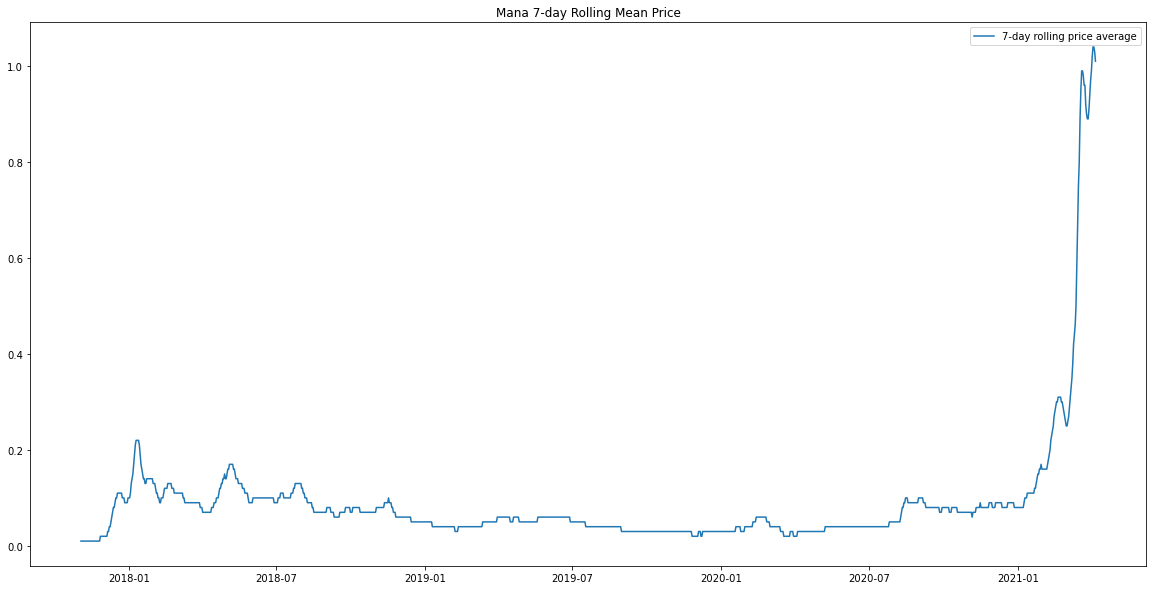

In [73]:
mana_7d_rolling_mean_price.plot(title="Mana 7-day Rolling Mean Price", figsize=[20, 10]);

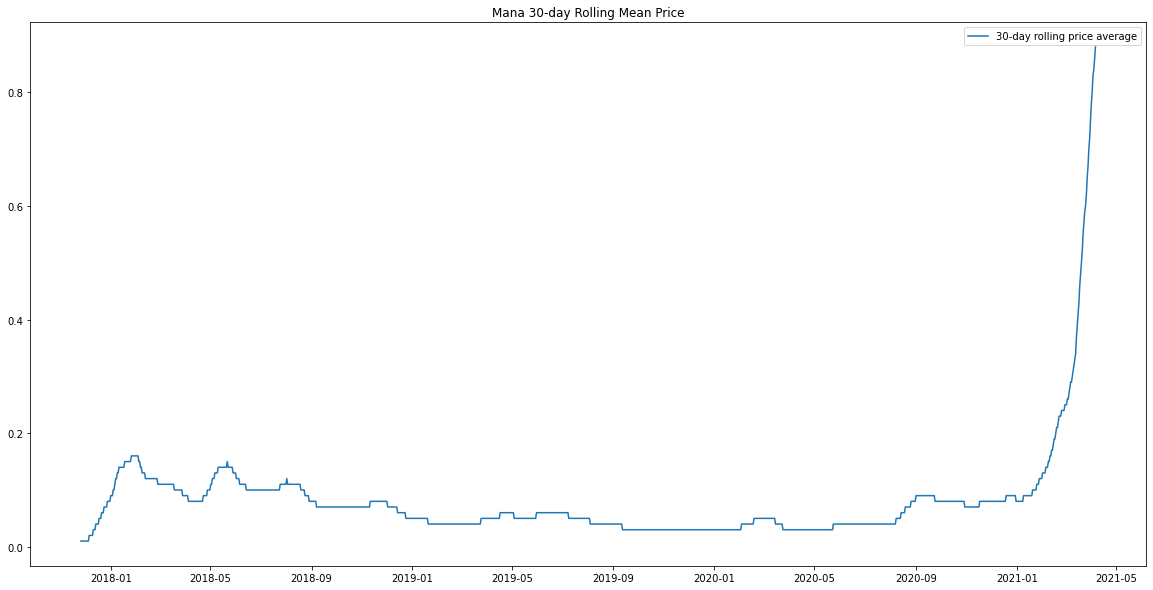

In [74]:
mana_30d_rolling_mean_price.plot(title="Mana 30-day Rolling Mean Price", figsize=[20, 10]);

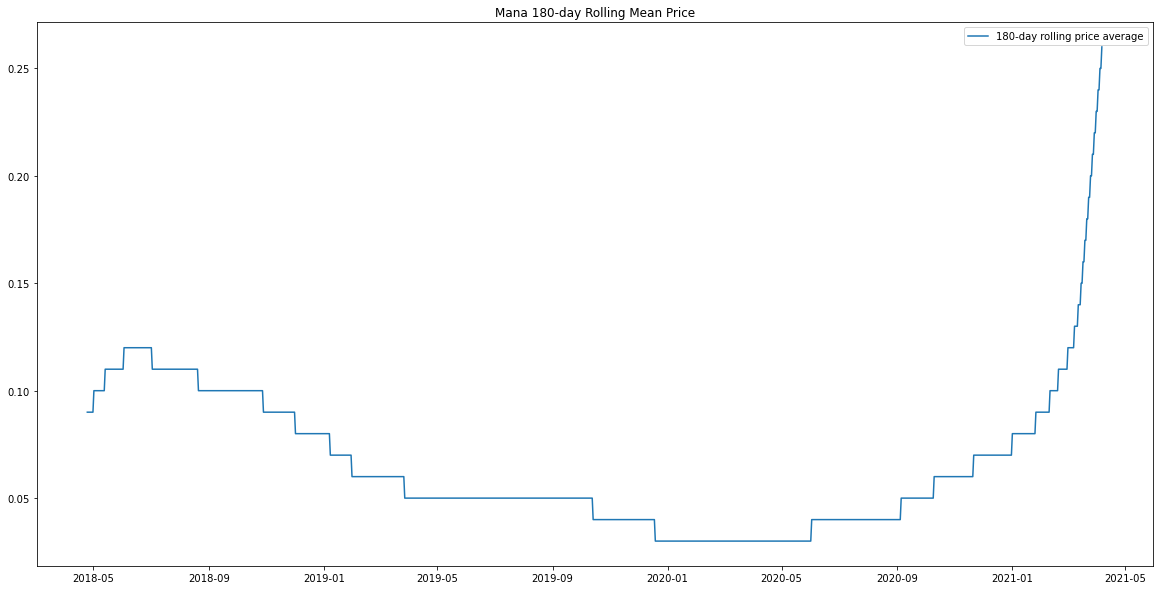

In [75]:
mana_180d_rolling_mean_price.plot(title="Mana 180-day Rolling Mean Price", figsize=[20, 10]);

** >>>>>>>>> 7 Day Rolling Stdev **

In [76]:
# Rolling 7 Day Standard Deviation

mana_7d_rolling_price_std = mana_prices.rolling(window=7).std().round(2).dropna()
mana_7d_rolling_price_std = mana_7d_rolling_price_std.rename(columns={'price': '7-day rolling price stdev'})

mana_30d_rolling_price_std = mana_prices.rolling(window=30).std().round(2).dropna()
mana_30d_rolling_price_std = mana_30d_rolling_price_std.rename(columns={'price': '30-day rolling price average'})

mana_180d_rolling_price_std = mana_prices.rolling(window=180).std().round(2).dropna()
mana_180d_rolling_price_std = mana_180d_rolling_price_std.rename(columns={'price': '180-day rolling price average'})


mana_7d_rolling_price_std.head()

,7-day rolling price stdev
2017-11-03,0.0
2017-11-04,0.0
2017-11-05,0.0
2017-11-06,0.0
2017-11-07,0.0


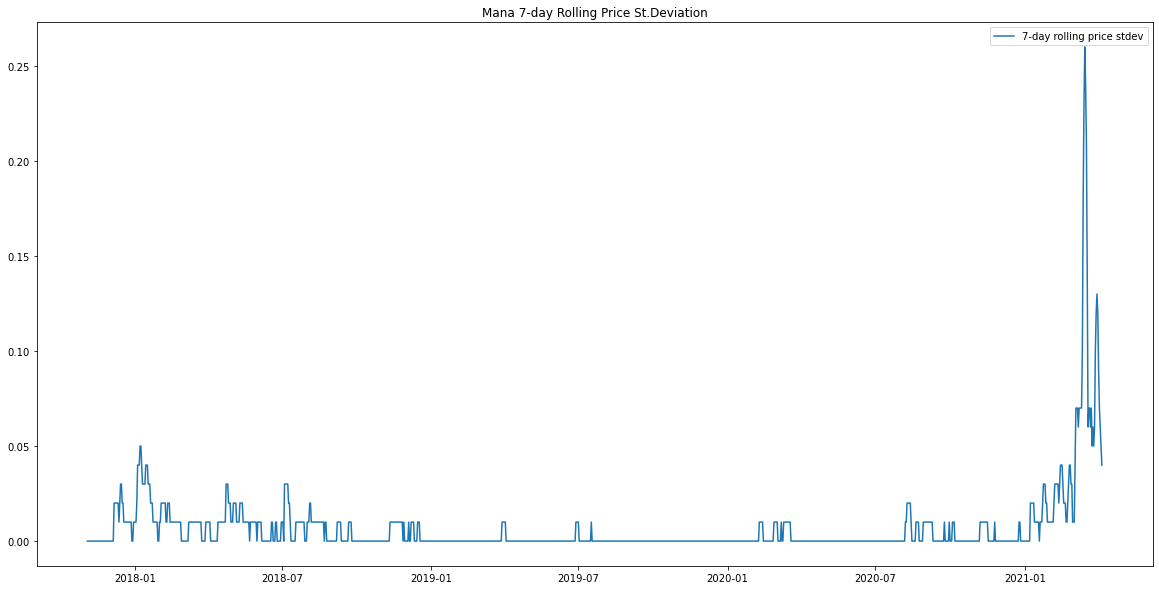

In [77]:
mana_7d_rolling_price_std.plot(title="Mana 7-day Rolling Price St.Deviation", figsize=[20, 10]);

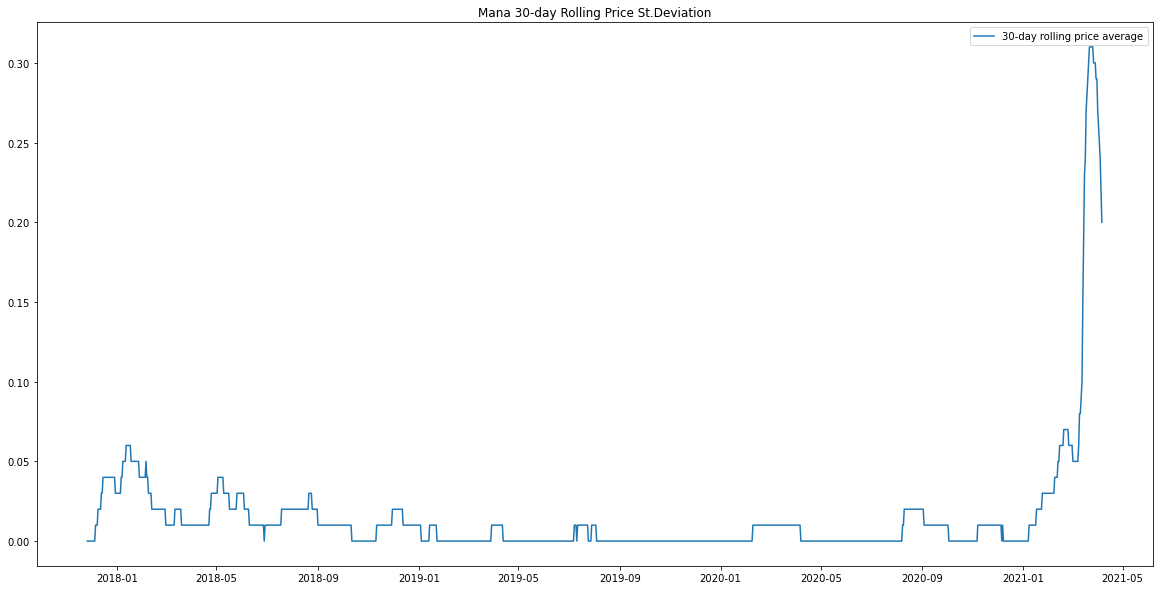

In [78]:
mana_30d_rolling_price_std.plot(title="Mana 30-day Rolling Price St.Deviation", figsize=[20, 10]);

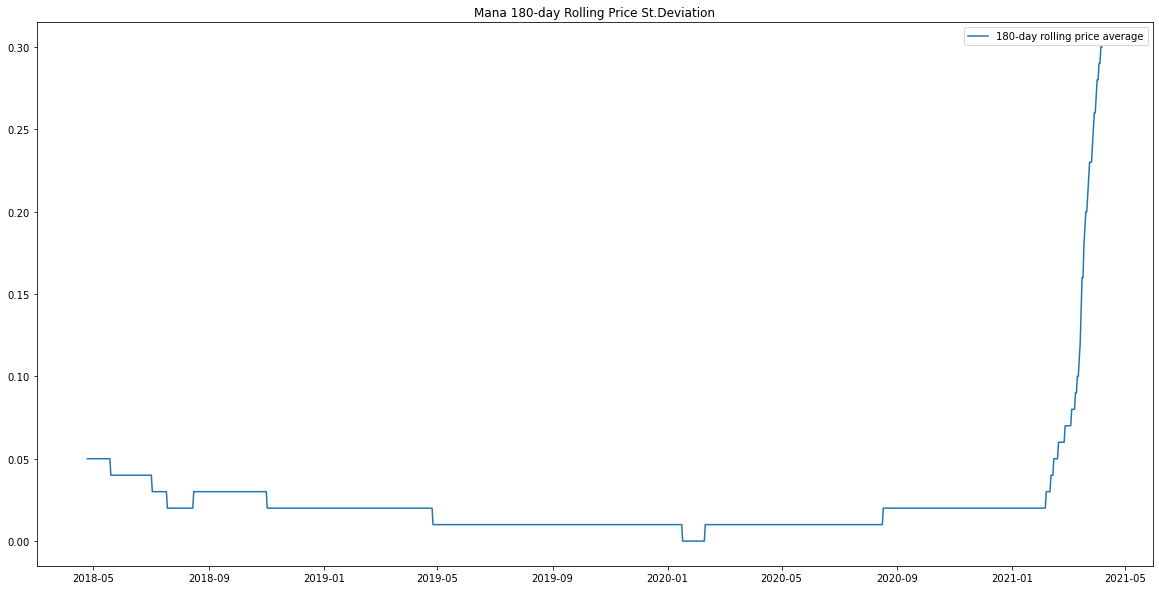

In [79]:
mana_180d_rolling_price_std.plot(title="Mana 180-day Rolling Price St.Deviation", figsize=[20, 10]);

** Add rolling averages on original plot **

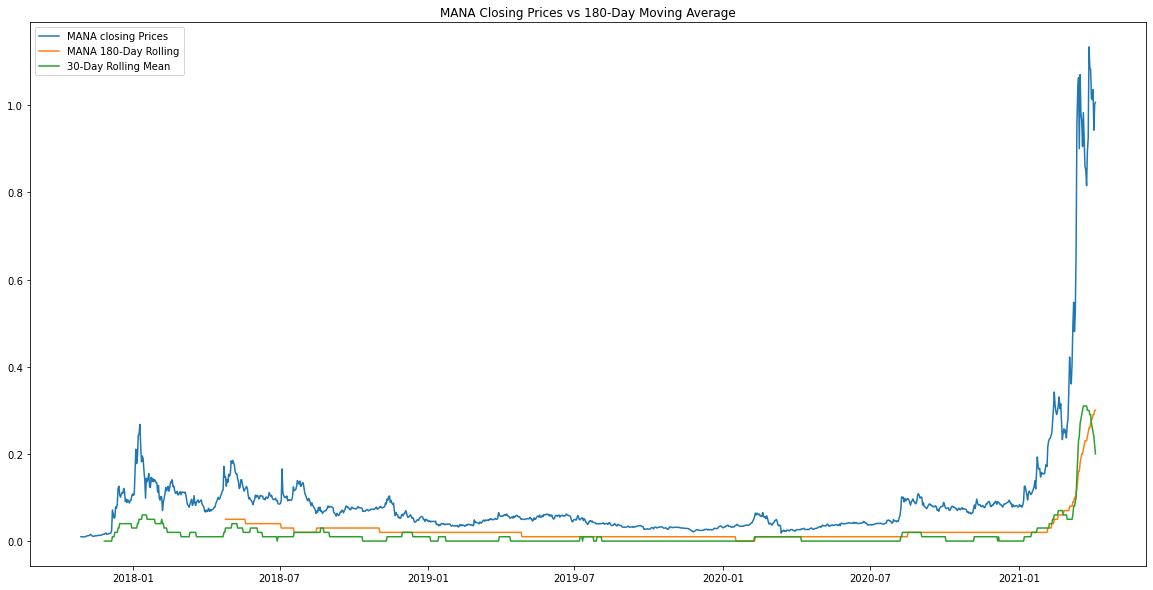

In [80]:
# Set figure of the daily closing prices of MANA
mana_prices_plot = mana_prices.plot(figsize=[20,10], title="MANA Closing Prices vs 180-Day Moving Average");

# Plot Rolling Means on the same figure
mana_180d_rolling_price_std.plot(ax=mana_prices_plot);
mana_30d_rolling_price_std.plot(ax=mana_prices_plot);


# Set the legend of the figure
mana_prices_plot.legend(['MANA closing Prices', 'MANA 180-Day Rolling', '30-Day Rolling Mean']);

In [81]:
# Therefore, 180 Day rolling average is very much below. Therefore, bull market

____________________________________________________________
** BETA CALCULATIONS **
____________________________________________________________

** import index csv into dataframe **

In [82]:
index_path = Path("../Resources/index_exports/2021-04-08-21-20-index.csv")
index_daily_prices_df = pd.read_csv(index_path, infer_datetime_format=True, parse_dates=True)
columns = ['date', 'daily_index_prices']
index_daily_prices_df.columns = columns
index_daily_prices_df['date'] = pd.to_datetime(index_daily_prices_df['date']).dt.date
index_daily_prices_df.set_index(index_daily_prices_df['date'], inplace=True)
index_daily_prices_df.drop(['date'], axis=1, inplace=True)
index_daily_prices_df


,daily_index_prices
date,
2021-01-27,3.028557
2021-01-28,2.749223
2021-01-29,3.204606
2021-01-30,3.041754
2021-01-31,2.997350
...,...
2021-04-02,10.185568
2021-04-03,10.247017
2021-04-04,9.795024


________________________________________________
### Combine DataFrames, Sort Index, and Rename Columns
________________________________________________

In [84]:
recent_mana_prices.head()

,price
2021-01-27,0.166735
2021-01-28,0.146896
2021-01-29,0.157639
2021-01-30,0.154034
2021-01-31,0.155607


In [28]:
# Create a new pivot table where the columns are the closing prices for each ticker
mana_v_index_prices_df = pd.concat([mana_prices, index_daily_prices_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
mana_v_index_prices_df = mana_v_index_prices_df.sort_index()

# Set column names to 'AMZN' and 'S&P 500'
mana_v_index_prices_df.columns = ["MANA", "Index"]

# Display a few rows
mana_v_index_prices_df.head()

,MANA,Index
2021-01-27,0.166735,3.028557
2021-01-28,0.146896,2.749223
2021-01-29,0.157639,3.204606
2021-01-30,0.154034,3.041754
2021-01-31,0.155607,2.997350


________________________________________________
### Correlations
________________________________________________

In [29]:
mana_v_index_prices_df.corr()

,MANA,Index
MANA,1.000000,0.414186
Index,0.414186,1.000000


### Calculate Daily Returns

In [31]:
daily_returns = mana_v_index_prices_df.pct_change().dropna()
daily_returns

,MANA,Index
2021-01-28,-0.118989,-0.092233
2021-01-29,0.073137,0.165640
2021-01-30,-0.022869,-0.050818
2021-01-31,0.010209,-0.014598
2021-02-01,-0.009828,0.087408
...,...,...
2021-04-02,-0.002880,-0.076526
2021-04-03,0.022435,0.006033
2021-04-04,-0.089739,-0.044110
2021-04-05,0.063084,0.056453


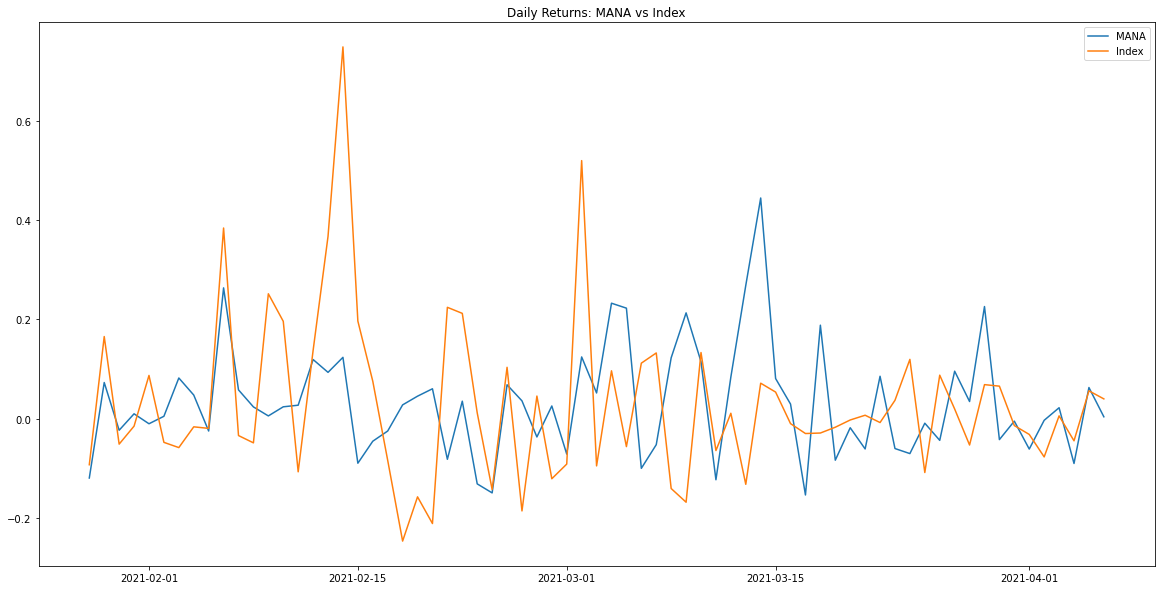

In [85]:
daily_returns.plot(figsize=[20,10], title="Daily Returns: MANA vs Index");

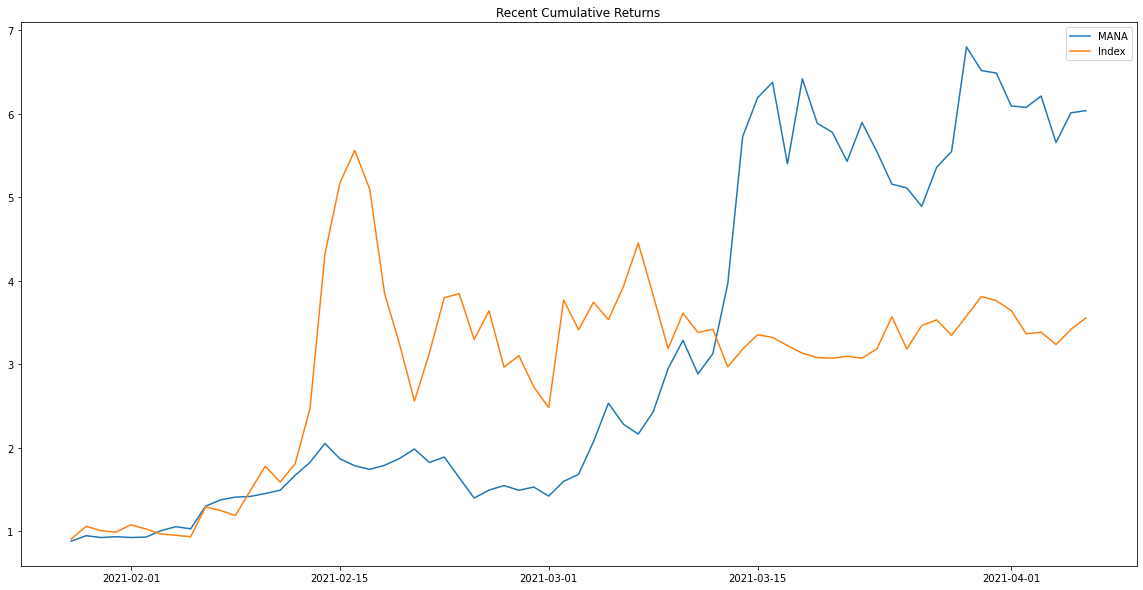

In [88]:
recent_cumulative_returns = (1 + daily_returns).cumprod()
recent_cumulative_returns.plot(figsize=[20,10], title="Recent Cumulative Returns");

### Calculate Variance of Index

In [33]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
index_variance = daily_returns['Index'].var()
print(f"the Index Variance is {round(index_variance, 2)}")

the Index Variance is 0.03


In [34]:
mana_variance = daily_returns['MANA'].var()
print(f"the Mana Variance is {round(mana_variance, 2)}")

the Mana Variance is 0.01


### Calculate Covariance of MANA returns vs. Index Returns

In [89]:
covariance = daily_returns['MANA'].cov(daily_returns['Index'])
print(f"the Covariance is {round(covariance, 4)}")

the Covariance is 0.0029


### Calculate Beta of MANA

In [91]:
mana_beta = covariance / mana_variance
print(f"the Mana Beta is is {round(mana_beta, 4)}")
print("A beta between 0 and 1 signifies that it moves in the same direction as the market, but with less volatility—that is, smaller percentage changes—than the market as a whole.")

the Mana Beta is is 0.2364
A beta between 0 and 1 signifies that it moves in the same direction as the market, but with less volatility—that is, smaller percentage changes—than the market as a whole.
